<a href="https://colab.research.google.com/github/alendoko/bina_private/blob/main/LB1/CODE/Mein_erstes_BI_Projekt_Loesung_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Tiefere Analyse des Superstore-Datensatzes: Produktkategorien & Regionen
In diesem Notebook analysieren wir den **Gesamtumsatz und Gewinn** nach **Produktkategorie** und **Region**.

**Datenquelle:** Sample Superstore Dataset (CSV)

## 🔹 1. Bibliotheken importieren
Wir laden die notwendigen Bibliotheken für unsere Analyse.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib-Style setzen
plt.style.use('ggplot')

## 📂 2. Superstore-Daten einlesen
Wir lesen die CSV-Datei ein. Falls du die Datei noch nicht hast, lade sie von Kaggle oder GitHub herunter.

In [3]:
# Correct GitHub Raw URL
url = "https://github.com/alendoko/bina/raw/refs/heads/main/LB1/DATA/Sample%20-%20Superstore.csv"

# Read CSV with correct encoding
df = pd.read_csv(url, encoding="latin1")  # Use 'latin1' if UTF-8 causes issues

# Display first rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 🔍 3. Überblick über die Daten
Bevor wir die Berechnungen durchführen, prüfen wir die Struktur des Datensatzes.

In [4]:
# Spaltennamen anzeigen
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
# Daten-Typen und Nullwerte checken
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## 🛒 4. Umsatz & Gewinn nach Produktkategorie
Welche Produktkategorien sind am umsatzstärksten und profitabelsten?

In [6]:
# Umsatz und Gewinn pro Kategorie berechnen
category_sales = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
category_sales

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


<Figure size 800x500 with 0 Axes>

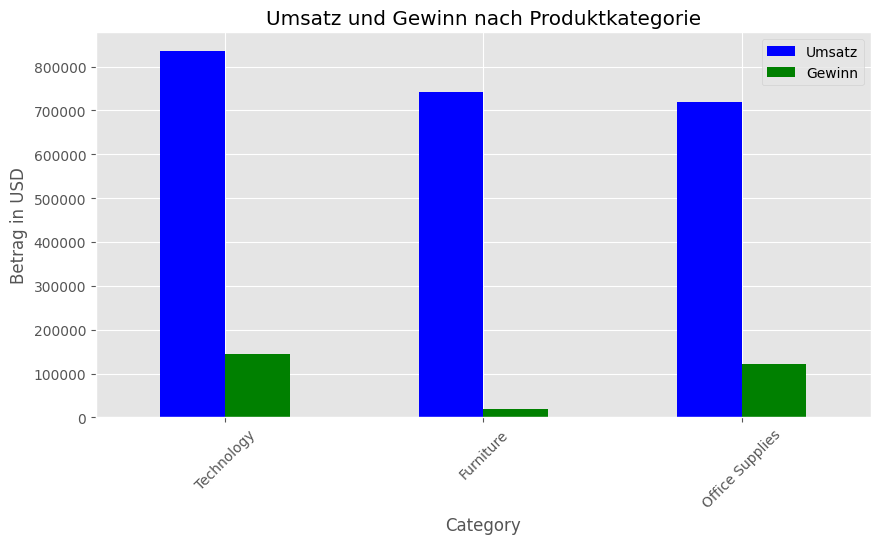

In [7]:
# Visualisierung der Kategorien
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', figsize=(10,5), color=['blue', 'green'])
plt.ylabel('Betrag in USD')
plt.title('Umsatz und Gewinn nach Produktkategorie')
plt.xticks(rotation=45)
plt.legend(['Umsatz', 'Gewinn'])
plt.show()

## 🌍 5. Umsatz & Gewinn nach Region
Welche Regionen sind am umsatzstärksten und profitabelsten?

In [8]:
# Umsatz und Gewinn pro Region berechnen
region_sales = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
region_sales

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


<Figure size 800x500 with 0 Axes>

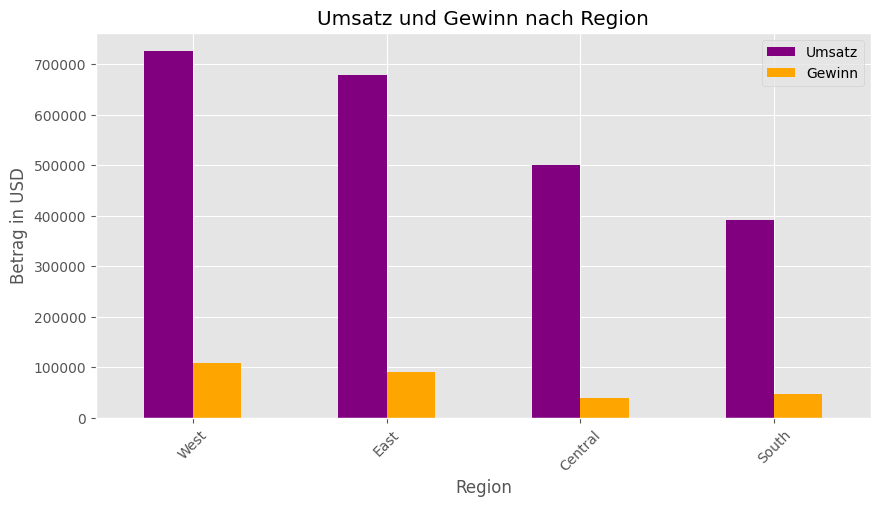

In [9]:
# Visualisierung der Regionen
plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', figsize=(10,5), color=['purple', 'orange'])
plt.ylabel('Betrag in USD')
plt.title('Umsatz und Gewinn nach Region')
plt.xticks(rotation=45)
plt.legend(['Umsatz', 'Gewinn'])
plt.show()

## 🏁 6. Fazit
- Die Analyse zeigt, welche **Produktkategorien** und **Regionen** am profitabelsten sind.
- Daraus lassen sich **strategische Entscheidungen** für Marketing und Vertrieb ableiten.
- Nächste Schritte könnten eine **Detailanalyse nach Stadt oder Kundensegment** sein.

💡 **Weiterführende Fragen:**
1. Welche Unterkategorien bringen den meisten Gewinn?
2. Gibt es Regionen, die trotz hohem Umsatz Verluste machen?
3. Wie verhält sich der Umsatz über die Zeit in verschiedenen Regionen?